In [1]:
from astropy.table import setdiff, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

from catalogues import Catalogue

# Plot all objects from each catalogue, with SuperWASP matches in black

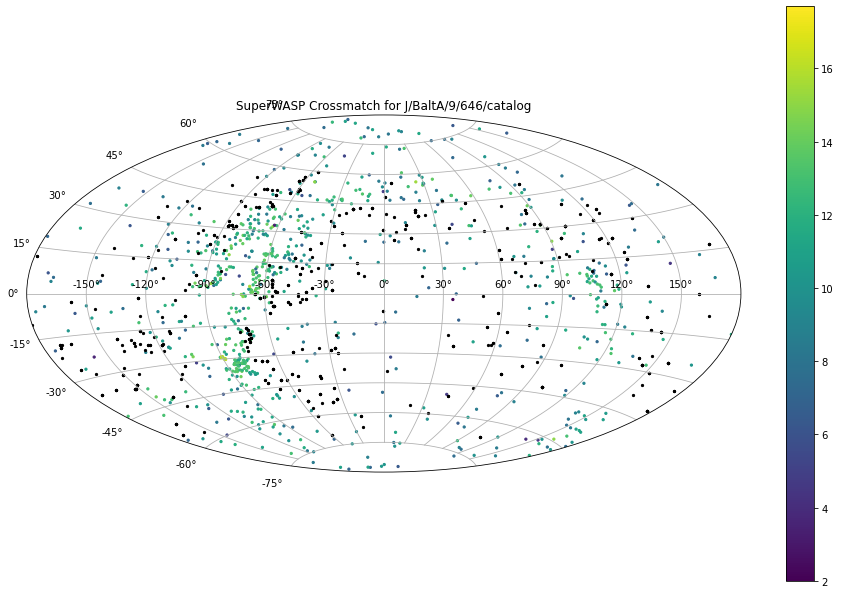

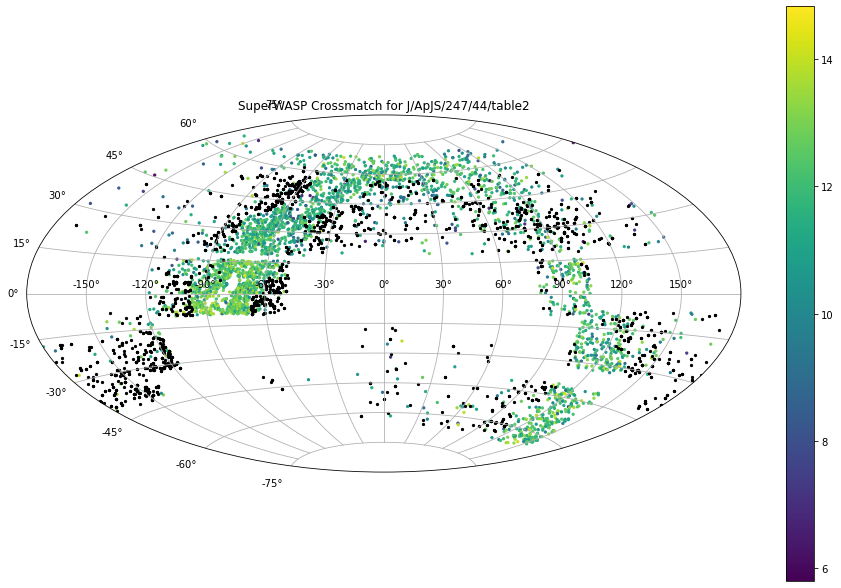

In [2]:
for catalogue in Catalogue.all():
    matched_ra_rad, matched_dec_rad = catalogue.coords_rad(catalogue.matched_coords)
    unmatched_ra_rad, unmatched_dec_rad = catalogue.coords_rad(catalogue.unmatched_coords)
    
    plt.figure(figsize=(16,8.4))
    plt.subplot(111, projection="aitoff")
    plt.title(f'SuperWASP Crossmatch for {catalogue}')
    plt.grid(True)
    sc = plt.scatter(
        unmatched_ra_rad,
        unmatched_dec_rad,
        s=5, 
        c=catalogue.unmatched_mag,
    )
    plt.colorbar(sc)
    plt.scatter(matched_ra_rad, matched_dec_rad, s=5, c='black')
    plt.subplots_adjust(top=0.95, bottom=0.0)
    plt.show()

# Find all objects which do not appear in SuperWASP

In [3]:
only_in_others = None
for catalogue in Catalogue.all():
    if not only_in_others:
        only_in_others = catalogue.coords_table(catalogue.unmatched_coords)
        continue
    duplicate_sources = catalogue.cross_match(source_table=only_in_others)
    new_sources = setdiff(catalogue.unmatched_table, duplicate_sources)
    only_in_others = vstack([only_in_others, catalogue.coords_table(catalogue.coords(new_sources))])
len(only_in_others)

Matching J/ApJS/247/44/table2 against None: 1/1


3637

# Find all objects which are in SuperWASP and at least one other catalogue

In [4]:
in_both = set()
for catalogue in Catalogue.all():
    in_both |= set(catalogue.matched_table['SuperWASP Coords'].tolist())
len(in_both)

2651

# Find all objects which are only in SuperWASP

In [5]:
only_in_superwasp = set(Catalogue.superwasp_sources()['SuperWASP Coords'].tolist()) - in_both
len(only_in_superwasp)

768084

# Plot combined cross matching results

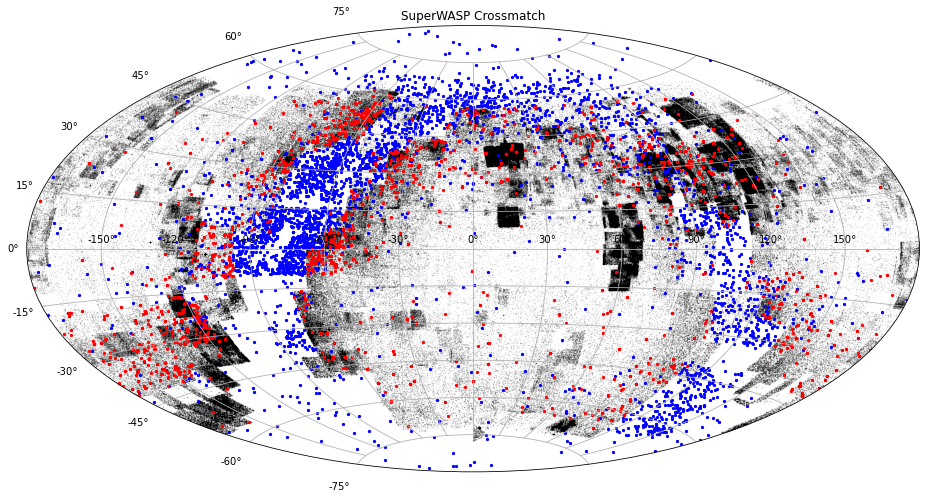

In [6]:
plt.figure(figsize=(16,8.4))
plt.subplot(111, projection="aitoff")
plt.title(f'SuperWASP Crossmatch')
plt.grid(True)

only_in_superwasp_ra, only_in_superwasp_dec = Catalogue.coords_rad(SkyCoord(list(only_in_superwasp), unit=(u.hour, u.deg)))
plt.scatter(
    only_in_superwasp_ra,
    only_in_superwasp_dec,
    s=0.1, 
    c='black',
    alpha=0.1,
)

only_in_others_ra, only_in_others_dec = Catalogue.coords_rad(SkyCoord(only_in_others['_RAJ2000'], only_in_others['_DEJ2000']))
plt.scatter(
    only_in_others_ra,
    only_in_others_dec,
    s=5, 
    c='blue',
)

in_both_ra, in_both_dec = Catalogue.coords_rad(SkyCoord(list(in_both), unit=(u.hour, u.deg)))
plt.scatter(
    in_both_ra,
    in_both_dec,
    s=5, 
    c='red',
)

plt.subplots_adjust(top=0.95, bottom=0.0)
plt.show()